In [1]:
import pandas as pd
x=[23,50,5,15,6,90,14,78]


In [2]:
df=pd.DataFrame(x,columns=['X'])

In [3]:
df


,X
0,23
1,50
2,5
3,15
4,6
5,90
6,14
7,78


In [4]:
min_threshold=df.X.quantile(.05)
max_threshold=df.X.quantile(.95)

In [5]:
df[df['X']>max_threshold]

,X
5,90


In [6]:
df[df['X']<min_threshold]

,X
2,5


In [7]:
df[(df['X']<max_threshold) & (df['X']>min_threshold)]#after removing outlier

,X
0,23
1,50
3,15
4,6
6,14
7,78


In [8]:
df[(df['X']<min_threshold)|(df['X']>max_threshold)]#outliers

,X
2,5
5,90


In [9]:
#banglor real estate price file
df=pd.read_csv('Downloads/bhp.csv')

In [10]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [11]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [12]:
min_threshold,max_threshold=df.price_per_sqft.quantile([.001,.999])

In [13]:
min_threshold,max_threshold

(1366.184, 50959.36200000099)

In [14]:
df[(df.price_per_sqft>max_threshold)|(df.price_per_sqft<min_threshold)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [15]:
###################using z score################

In [16]:
df=pd.read_csv("Downloads/heights.csv")

In [17]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\princ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([   5.,   18.,   66.,  152.,  322.,  604.,  870., 1036., 1117.,
        1079., 1108., 1059.,  891.,  721.,  510.,  255.,  120.,   43.,
          19.,    5.]),
 array([54.26313333, 55.49991378, 56.73669423, 57.97347468, 59.21025513,
        60.44703559, 61.68381604, 62.92059649, 64.15737694, 65.39415739,
        66.63093784, 67.86771829, 69.10449874, 70.34127919, 71.57805964,
        72.81484009, 74.05162055, 75.288401  , 76.52518145, 77.7619619 ,
        78.99874235]),
 <a list of 20 Patch objects>)

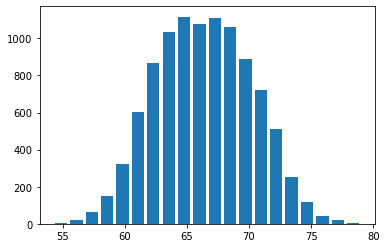

In [19]:
plt.hist(df.height,bins=20,rwidth=0.8)

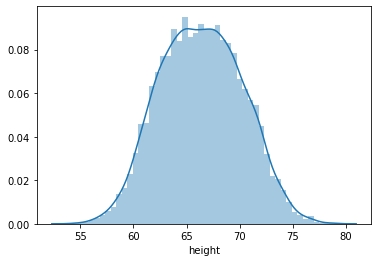

In [20]:
sns.distplot(df.height)

In [21]:
mean=df.height.mean()

In [22]:
std=df.height.std()

In [23]:
outerlimit=mean+3*std

In [24]:
outerlimit

77.91014411725232

In [25]:
lowerlimit=mean-3*std

In [26]:
lowerlimit

54.824975392478876

In [27]:
df[(df.height>outerlimit)|(df.height<lowerlimit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [28]:
df['zscore']=(df.height-df.height.mean())/df.height.std()

In [29]:
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [30]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [31]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [33]:
df[(df.zscore>3)|(df.zscore<-3)]

(7, 3)

In [34]:
#using iqr

In [36]:
Q1=df.height.quantile(.25)

In [37]:
Q3=df.height.quantile(.75)

In [38]:
IQR=Q3-Q1

In [39]:
upper_limit=Q3+IQR*1.5

In [40]:
lower_limit=Q1-IQR*1.5

In [45]:
df[(df.height>=lower_limit)&(df.height<=upper_limit)]

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [47]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
7294,Female,54.873728,-2.987329
9285,Female,54.263133,-3.146027
